### Useful Cmds
document.querySelector('video').playbackRate = 3;

## Logging in python

In [ ]:
from IPython.core import logger
import logging,os

os.makedirs("/content/logs", exist_ok=True)
# base config
logging.basicConfig(
    filename='/content/logs/app.log',
    filemode='w',
    force=True,
    level=logging.DEBUG,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S')
# seperate loggers
logger1 = logging.getLogger('module1')
logger2 = logging.getLogger('module2')
# logging kinds
logging.debug("Debug message")
logging.info("Info message")
logging.warning("Warning message")
logging.error("Error message")
logging.critical("Critical message")

In [ ]:
def add(a,b):
  logging.info(f"Adding {a} and {b}")
  return a+b
logging.debug("The addition was done")
add(12,12)

24

## Multi-threading and Multi-processing

In [ ]:
# Threading use-case example
import threading,time
import requests
from bs4 import BeautifulSoup
# from concurrent.futures import ProcessPoolExecutor,ThreadPoolExecutor
urls =[
    "https://docs.langchain.com/oss/python/langchain/quickstart",
    "https://docs.langchain.com/oss/python/langgraph/quickstart"
]

def fetch_content(url):
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser')
  print(f'Fetched : {len(soup.text)} charsfrom {url}')

threads=[]

for url in urls:
  thread = threading.Thread(target=fetch_content,args=(url,))
  threads.append(thread)
  thread.start()
for thread in threads:
    thread.join()
print ("All web pages fetched")



Fetched : 10992 charsfrom https://docs.langchain.com/oss/python/langchain/quickstart
Fetched : 14793 charsfrom https://docs.langchain.com/oss/python/langgraph/quickstart
All web pages fetched


In [ ]:
# Processes use-case example

import multiprocessing,math,sys,time

sys.set_int_max_str_digits(100000)

# factorial function
def fact(nums):
  print (f'Computing factorial of {nums}')


# 1. Handling missing values     

In [ ]:
import seaborn as sns

In [ ]:
df=sns.load_dataset('titanic')
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [ ]:
df.isnull().head()
df.isnull().sum()
df.shape

(891, 15)

In [ ]:
df.dropna(axis=0,inplace=True)
df.shape

(182, 15)

## Imputation of missing values

### 1. Mean val imputation :
works well when normally dist. data is present

<Axes: xlabel='age', ylabel='Count'>

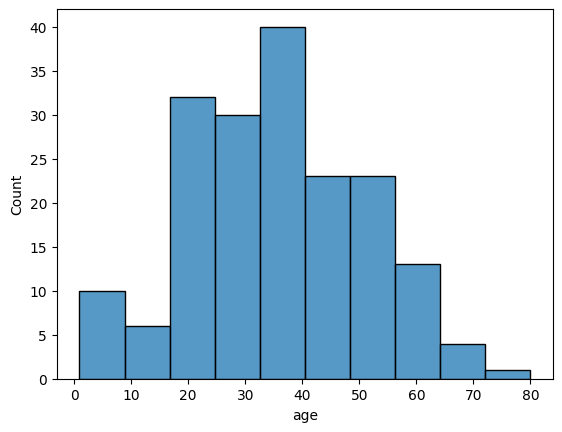

In [ ]:
sns.histplot(df['age'])

In [ ]:
df['Age_mean']=df['age'].fillna(df['age'].mean())
df[['Age_mean','age']].head()

Age_mean   age
1       38.0  38.0
3       35.0  35.0
6       54.0  54.0
10       4.0   4.0
11      58.0  58.0

### 2. Median value imputation :
works well with data with outliers

In [ ]:
df['Age_median']=df['age'].fillna(df['age'].median())
df[['Age_median','age']].head()

Age_median   age
1         38.0  38.0
3         35.0  35.0
6         54.0  54.0
10         4.0   4.0
11        58.0  58.0

### 2. Mode imputation :
works well with categorical values

In [ ]:
df['Age_mode']=df['age'].fillna(df['age'].median())
df[['Age_mode','age']].head()

Age_mode   age
1       38.0  38.0
3       35.0  35.0
6       54.0  54.0
10       4.0   4.0
11      58.0  58.0

In [ ]:
df[df['embarked'].isnull()]
df['embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [ ]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]


In [ ]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [ ]:
df[['embarked_mode','embarked']].head()

embarked_mode embarked
1              C        C
3              S        S
6              S        S
10             S        S
11             S        S

### 4. Random Sampling method

## Handling imbalanced datasets

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(42)
#dataframe define
n_samples=1000
class_0_ratio=0.9
n0_class =  int(n_samples * class_0_ratio)
n1_class = n_samples - n0_class

In [ ]:
n0_class,n1_class

(900, 100)

In [ ]:
#dataframe creation
class0= pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n0_class),
    'feature_2':np.random.normal(loc=0,scale=1,size=n0_class),
    'target':[0]*n0_class
})
class1= pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n1_class),
    'feature_2':np.random.normal(loc=2,scale=1,size=n1_class),
    'target':[1]*n1_class
})
df=pd.concat([class0,class1]).reset_index(drop=True)
df.head()

feature_1  feature_2  target
0  -0.675178  -0.045512       0
1  -0.144519  -0.424236       0
2  -0.792420  -0.569833       0
3  -0.307962   0.329509       0
4  -1.893615  -1.517174       0

In [ ]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

### 1. Up Sampling


In [ ]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [ ]:
from sklearn.utils import resample
df_minority_upsampled=resample(
    df_minority,replace=True,n_samples=len(df_minority),random_state=42
    )

In [ ]:
df_minority_upsampled.shape

(100, 3)

In [ ]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])#.value_counts()

In [ ]:
df_upsampled['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

### 2. Down Sampling

In [ ]:
df_majority_downsampled=resample(
    df_majority,replace=False,n_samples=len(df_majority),random_state=42
    )

In [ ]:
df_majority_downsampled.shape

(900, 3)

In [ ]:
df_majority_downsampled.head()

feature_1  feature_2  target
70    0.965397  -1.912255       0
827  -0.062004   1.069771       0
231   0.790626  -0.037571       0
588  -0.800039  -0.924564       0
39   -1.769076  -0.392471       0

In [ ]:
df_downsampled=pd.concat([df_minority,df_majority_downsampled])#.value_counts()
df_downsampled.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

### 3. Synthetic Minority Oversampling Technique : Interpolation

In [ ]:
from sklearn.datasets import make_classification
X,y=make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.9],
    random_state=42
)

In [ ]:
import pandas as pd
df1=pd.DataFrame(X,columns=['feature_1','feature_2'])
df2=pd.DataFrame(y,columns=['target'])
df=pd.concat([df1,df2],axis=1)
#df['target']=y
df.head()

feature_1  feature_2  target
0   1.073546  -1.101339       0
1   0.755945  -1.172352       0
2   1.354479  -0.948528       0
3   3.103090   0.233485       0
4   1.951888  -0.270157       0

In [ ]:
df['target'].value_counts()

target
0    896
1    104
Name: count, dtype: int64

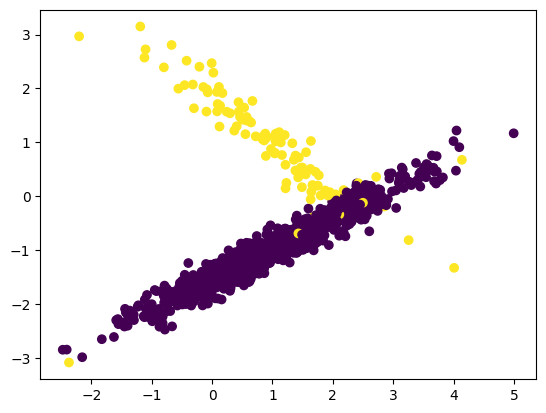

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['feature_1'],df['feature_2'],c=df['target'])
plt.show()

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(sampling_strategy='minority')
X,y=oversample.fit_resample(df[['feature_1','feature_2']],df['target'])
X.shape

(1792, 2)

In [ ]:
y.shape

(1792,)

In [ ]:
len(y[y==0])


896

In [ ]:
df1=pd.DataFrame(X,columns=['feature_1','feature_2'])
df2=pd.DataFrame(y,columns=['target'])
oversampled_df=pd.concat([df1,df2],axis=1)
oversampled_df.head()

feature_1  feature_2  target
0   1.073546  -1.101339       0
1   0.755945  -1.172352       0
2   1.354479  -0.948528       0
3   3.103090   0.233485       0
4   1.951888  -0.270157       0

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

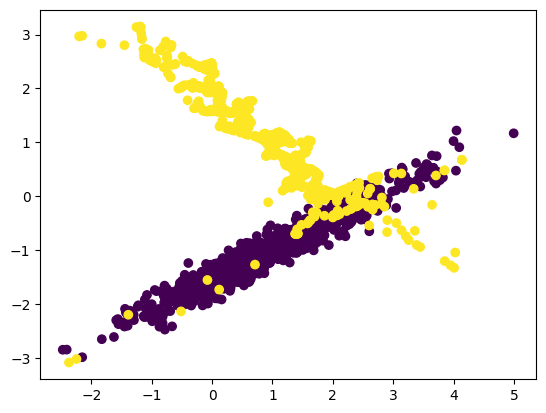

In [ ]:
plt.scatter(oversampled_df['feature_1'],oversampled_df['feature_2'],c=oversampled_df['target'])
plt

## Handling Outliers

### 5 number summary and Box Plot

In [ ]:
import numpy as np
list_marks=[12,14,53,123,2,53,53,12,54,34,45,23,45,65,23,13,53,63,35,64,63]
min,q1,median,q3,max=np.quantile(list_marks,[0,0.25,0.5,0.75,1.0])
min,q1,median,q3,max

(np.float64(2.0),
 np.float64(23.0),
 np.float64(45.0),
 np.float64(54.0),
 np.float64(123.0))

In [ ]:
iqr=q3-q1
print (iqr)

31.0


In [ ]:
lower_fence = q1-1.5*iqr
higher_fence = q3+1.5*iqr
lower_fence,higher_fence

(np.float64(-23.5), np.float64(100.5))

<Axes: >

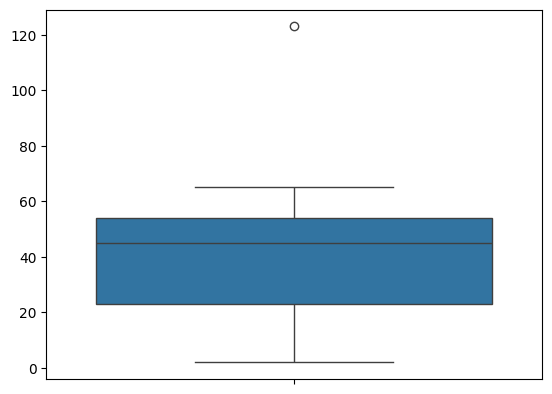

In [ ]:
import seaborn as sns
sns.boxplot(list_marks)

# Data encoding
## 1. Nominal / one-hot encoding
categorical data to numerical

one_hot_encoder : put the current value as 1, rest as 0

In [ ]:
#dummy df
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df=pd.DataFrame({
    'color':['red','blue','green','green','red','blue']
})
df

color
0    red
1   blue
2  green
3  green
4    red
5   blue

In [ ]:
ohe_enc=OneHotEncoder()
# returns a sparse row matrix
encoded = ohe_enc.fit_transform(df[['color']]).toarray()

In [ ]:
encoded_df = pd.DataFrame(encoded, columns=ohe_enc.get_feature_names_out())
encoded_df

color_blue  color_green  color_red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         0.0          1.0        0.0
4         0.0          0.0        1.0
5         1.0          0.0        0.0

## 2. Label/Ordinal encoder
Label : unordered/rankless

Ordinal : have some sort of ranking

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
lbl_enc.fit_transform(df['color'])

array([2, 0, 1, 1, 2, 0])

In [ ]:
lbl_enc.transform(['red','blue','green'])

array([2, 0, 1])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# categories are ranked
ord_enc = OrdinalEncoder(categories=[['small','medium','large']])
#rank holding data
df = pd.DataFrame({
    'size': ['small', 'medium', 'large', 'medium', 'small', 'large']
})

ord_enc.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [ ]:
ord_enc.transform([['small'],['medium'],['large']])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[0.],
       [1.],
       [2.]])

### Target Guiding Ordinal encoding
: used when categorical values have some kind of relation with target value and can be used as feature by assigning labels based on their relationship with target

In [ ]:
import pandas as pd
# dataset
data = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York',  'London'],
    'price': [200, 150, 300, 250, 180, 320]
})

In [ ]:
mean_price=data.groupby('city')['price'].mean().to_dict()
mean_price

{'London': 235.0, 'New York': 190.0, 'Paris': 300.0, 'Tokyo': 250.0}

In [ ]:
data['city_encoded']=data['city'].map(mean_price)
data

city  price  city_encoded
0  New York    200         190.0
1    London    150         235.0
2     Paris    300         300.0
3     Tokyo    250         250.0
4  New York    180         190.0
5    London    320         235.0

# Exploratory Data Analysis


## 1. Red wine data

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/adit-0132/machine-learning-practice/refs/heads/main/datasets/winequality-red.csv', sep=';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
df.info() #summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe() #descriptive stats

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
#check missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# check duplicate records
df.duplicated().sum()

np.int64(240)

In [ ]:
# remove duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [ ]:
# correlation
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidity           -0.002449   0.055154            -0.020945   
citric acid                 0.143892   0.210195            -0.048004   
residual sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free sulfur dioxide         0.160527   0.000749             1.000000   
total sulfur dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
pH                         -0.083143  -0.270893             0.056631   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   
quality                     0.013640  -0.130988            -0.050463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103777  0.670195 -0.686685   0.190269   
volatile acidity                  0.071701  0.023943  0.247111  -0.256948   
citric acid                       0.047358  0.357962 -0.550310   0.326062   
residual sugar                    0.201038  0.324522 -0.083143  -0.011837   
chlorides                         0.045773  0.193592 -0.270893   0.394557   
free sulfur dioxide               0.667246 -0.018071  0.056631   0.054126   
total sulfur dioxide              1.000000  0.078141 -0.079257   0.035291   
density                           0.078141  1.000000 -0.355617   0.146036   
pH                               -0.079257 -0.355617  1.000000  -0.214134   
sulphates                         0.035291  0.146036 -0.214134   1.000000   
alcohol                          -0.217829 -0.504995  0.213418   0.091621   
quality                          -0.177855 -0.184252 -0.055245   0.248835   

                       alcohol   quality  
fixed acidity        -0.061596  0.119024  
volatile acidity     -0.197812 -0.395214  
citric acid           0.105108  0.228057  
residual sugar        0.063281  0.013640  
chlorides            -0.223824 -0.130988  
free sulfur dioxide  -0.080125 -0.050463  
total sulfur dioxide -0.217829 -0.177855  
density              -0.504995 -0.184252  
pH                    0.213418 -0.055245  
sulphates             0.091621  0.248835  
alcohol               1.000000  0.480343  
quality               0.480343  1.000000

<Axes: >

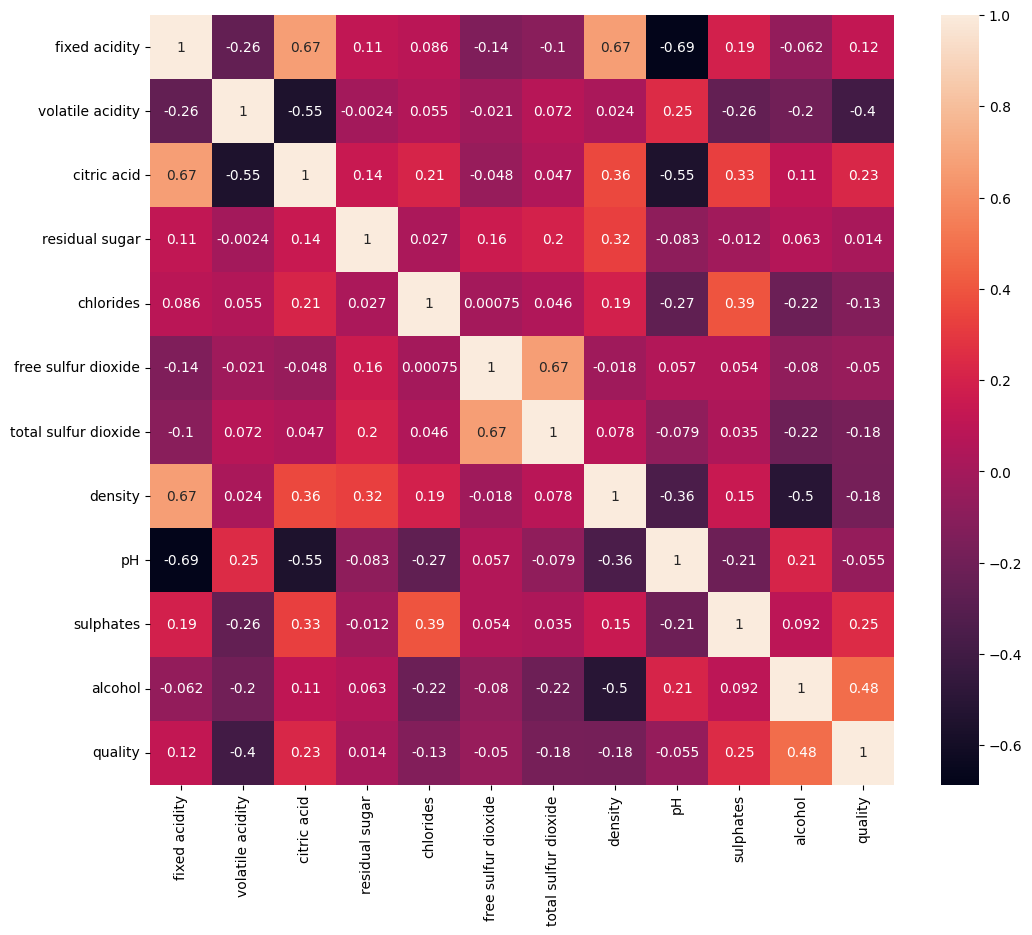

In [ ]:
# playing around w Visualization

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Wine Quality Count')

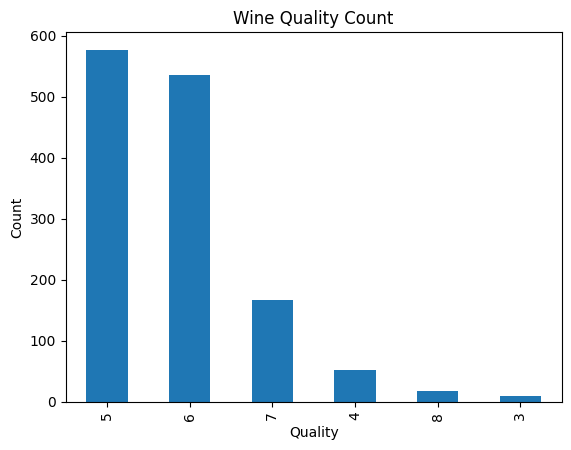

In [ ]:
df.quality.value_counts().plot(kind='bar')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Wine Quality Count')
#plt.show()

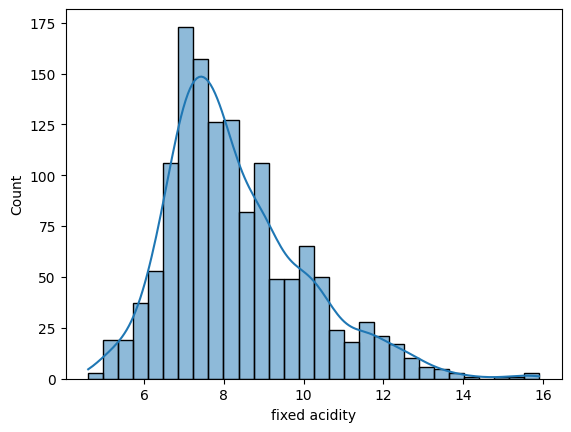

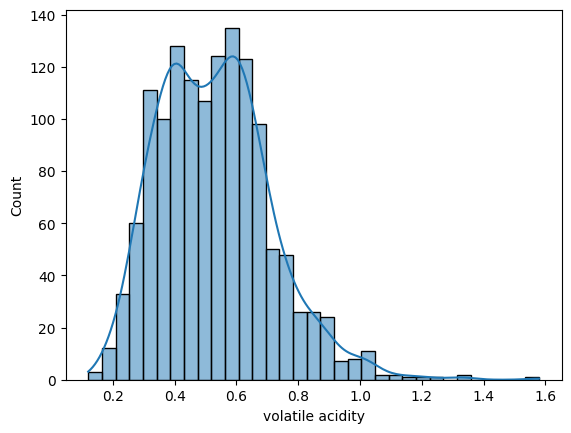

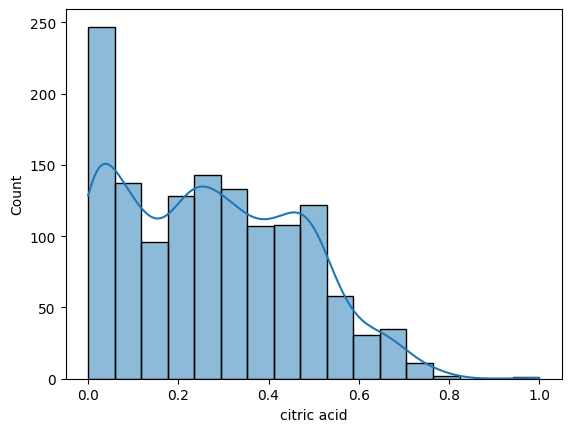

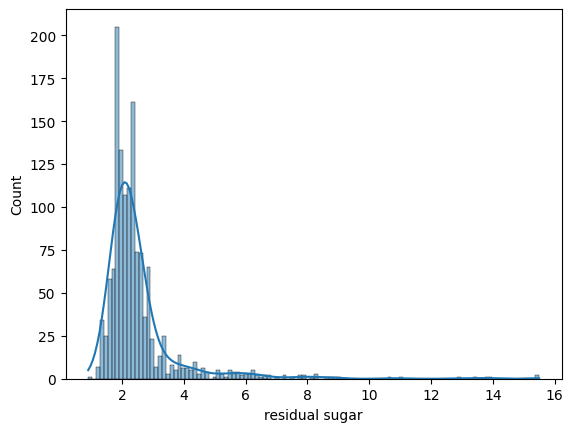

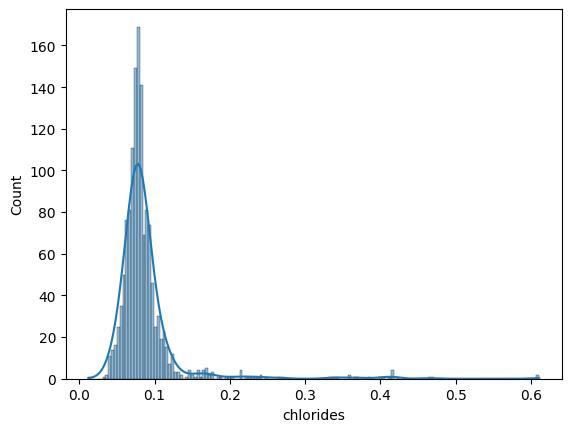

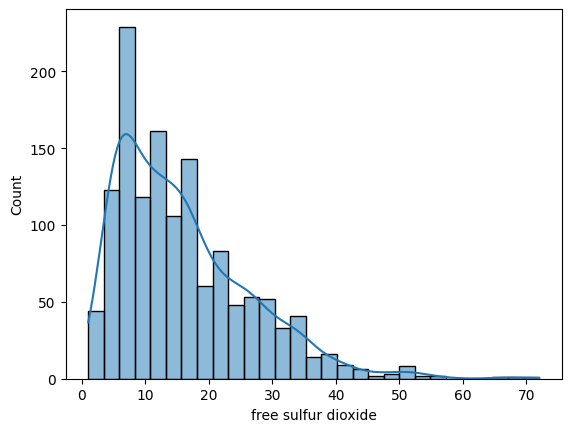

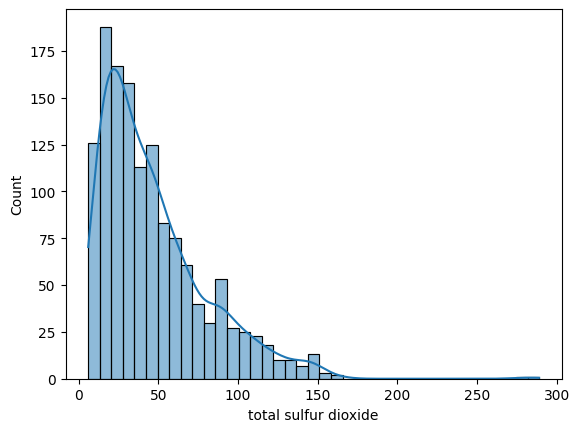

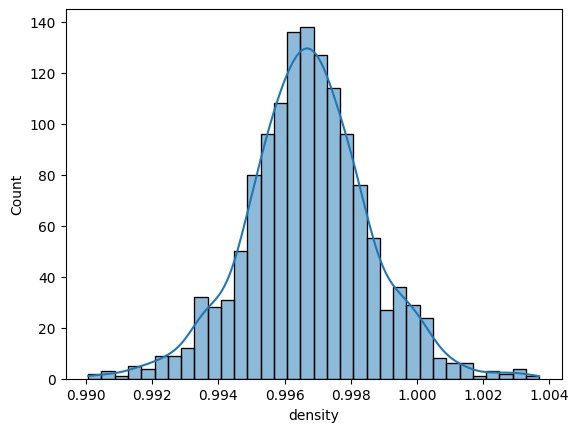

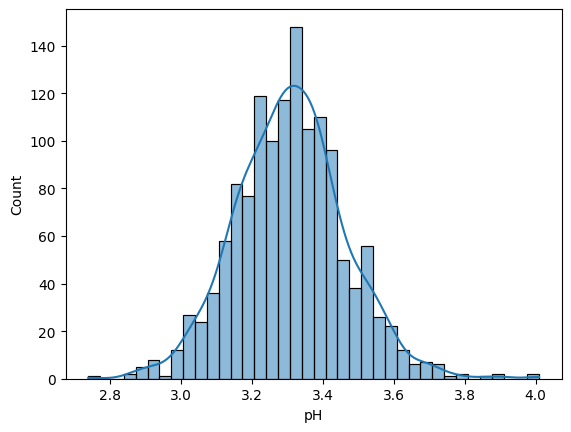

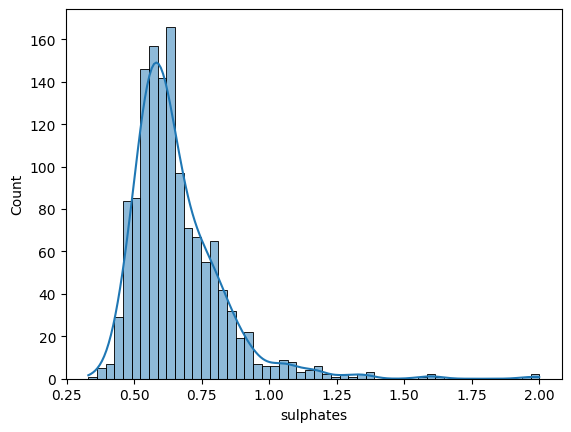

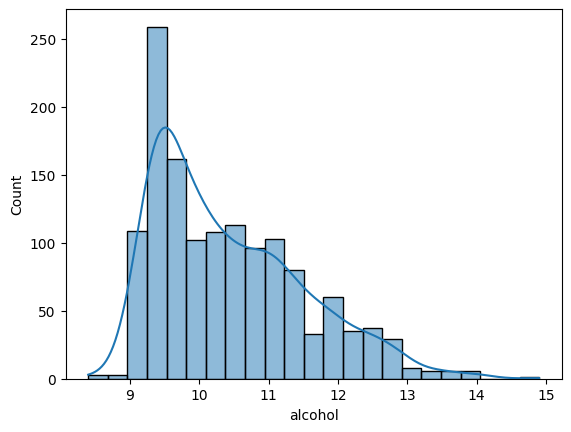

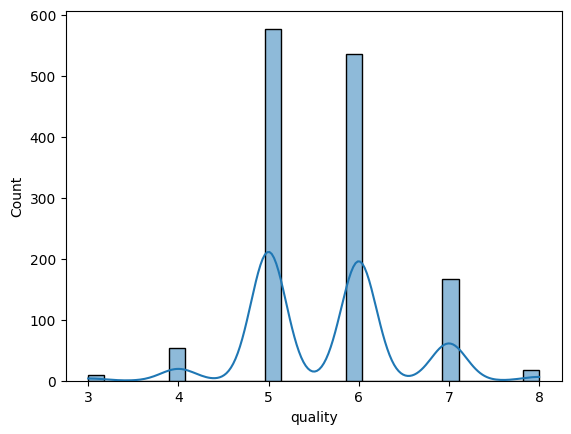

In [ ]:
for col in df.columns:
  sns.histplot(df[col],kde=True)
  plt.show()

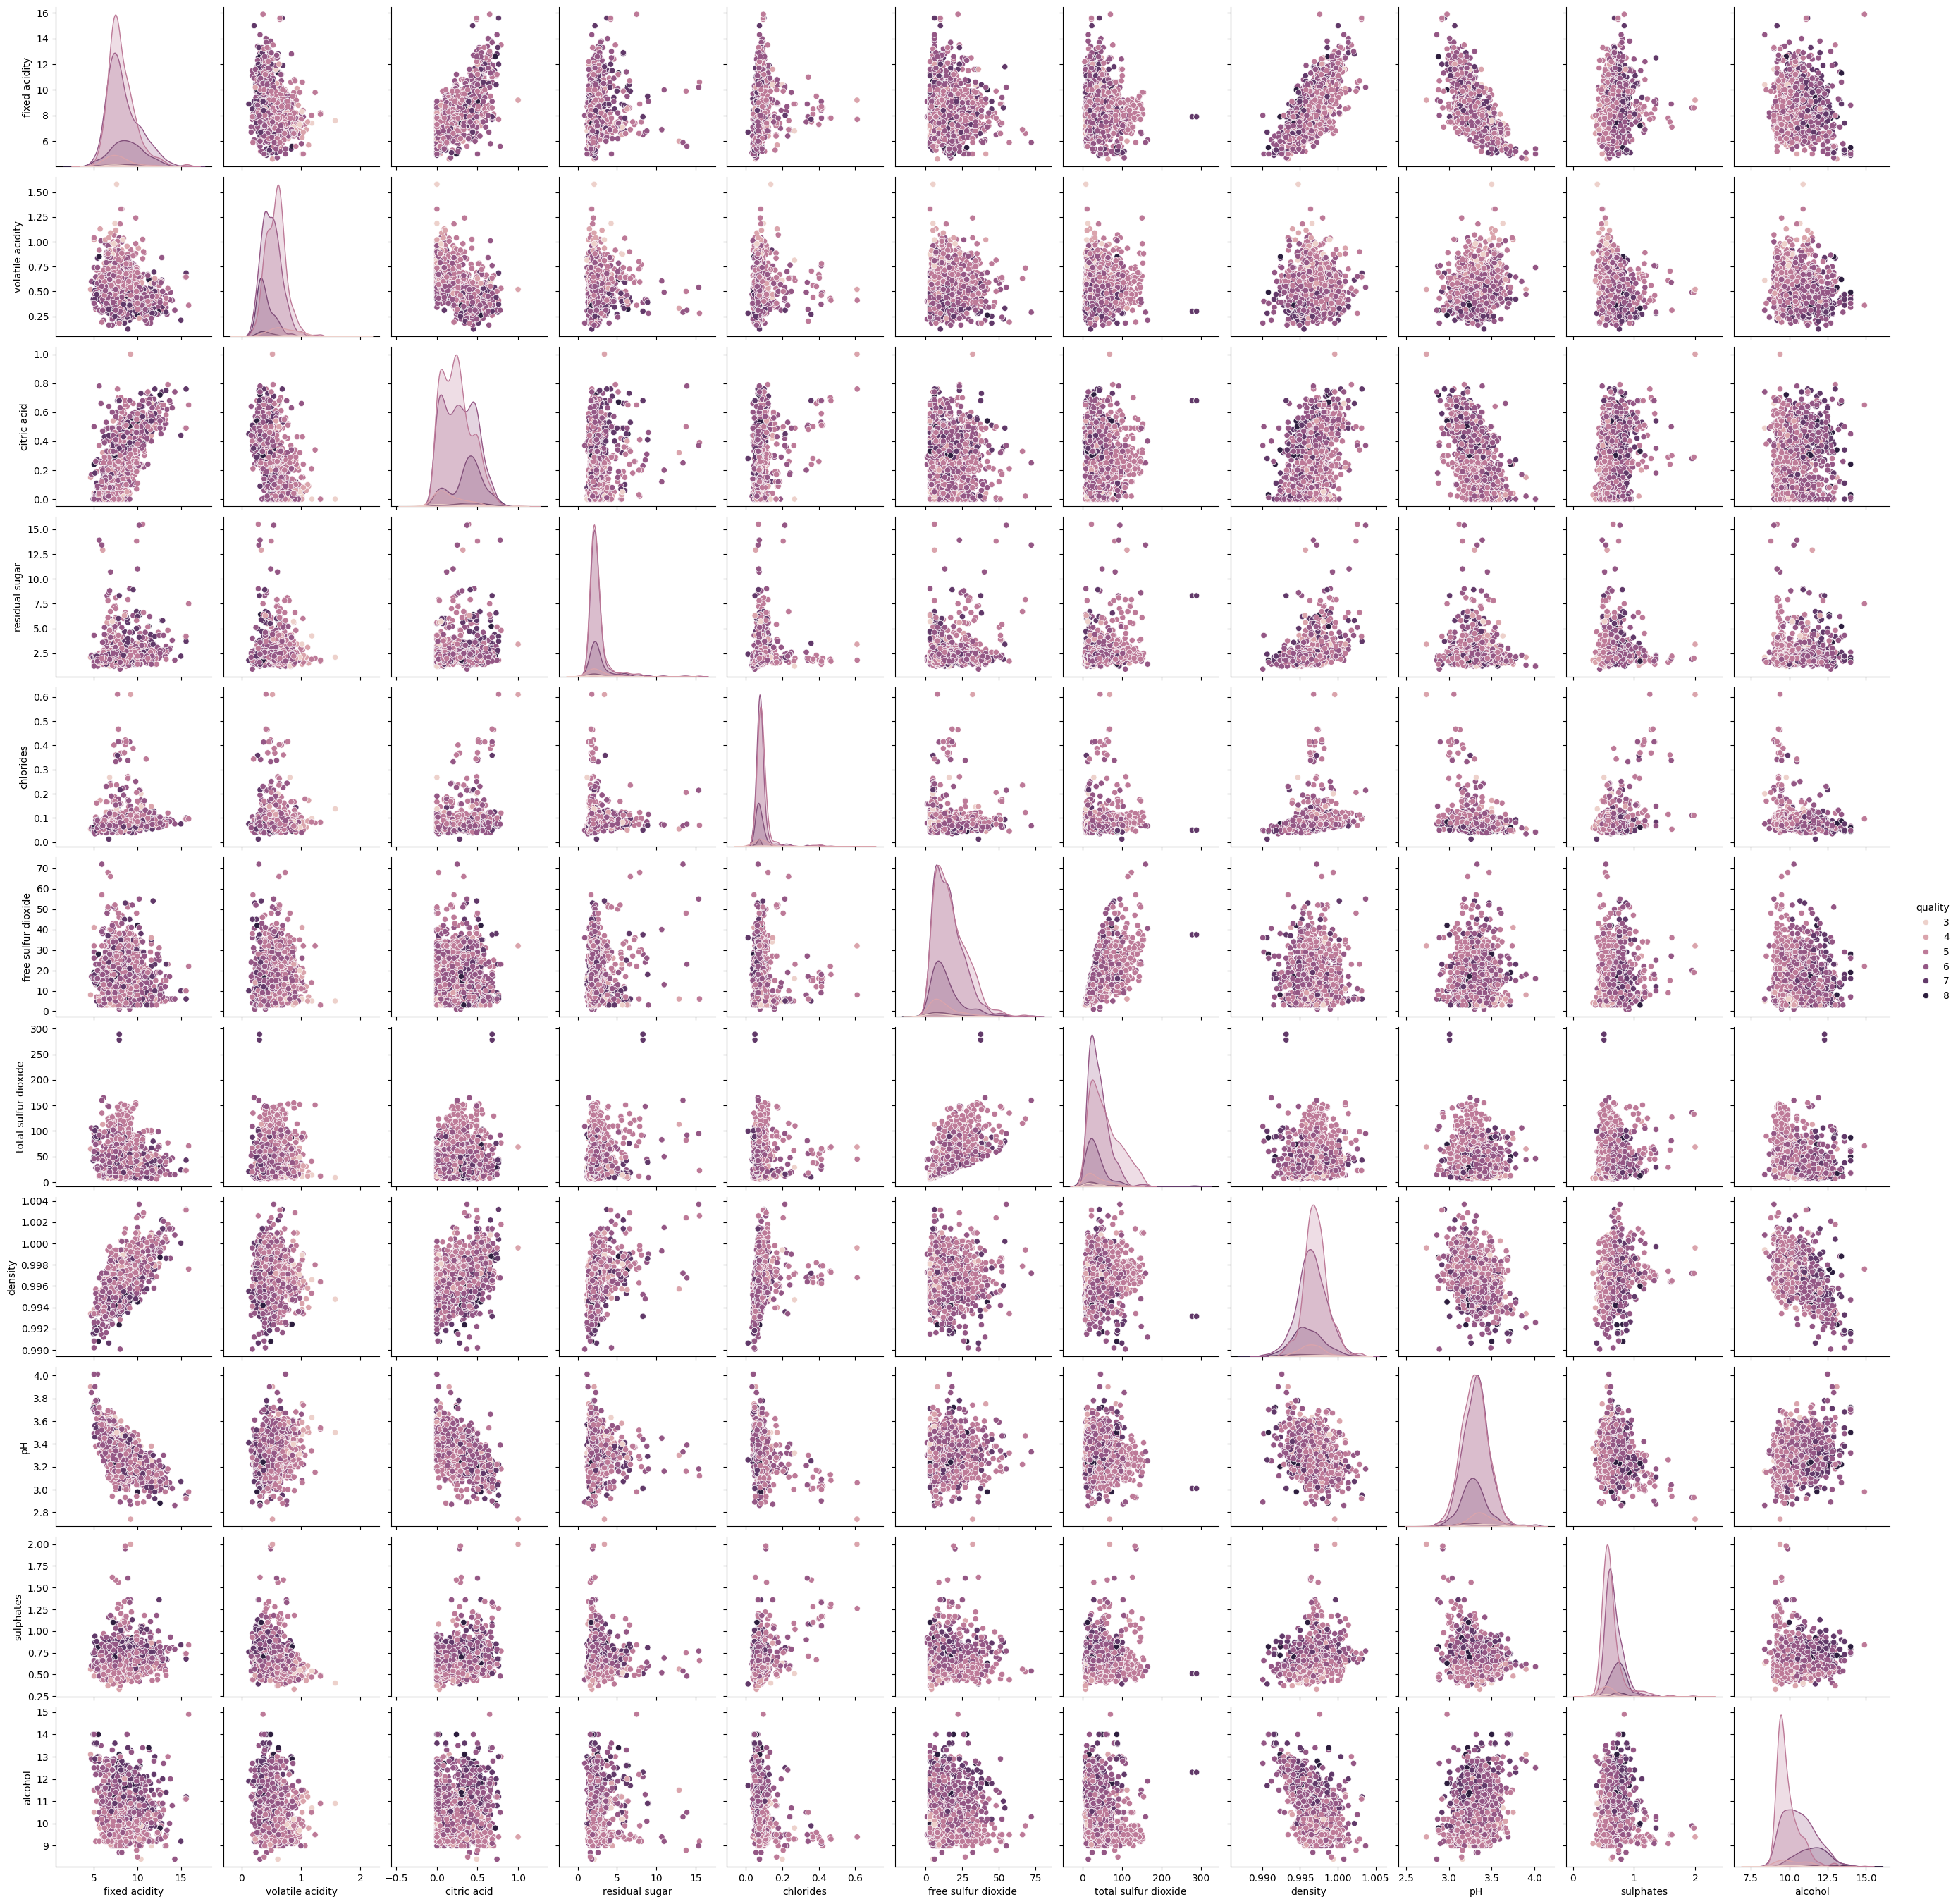

In [ ]:
#univariate, bivariate analysis
sns.pairplot(df,hue='quality')

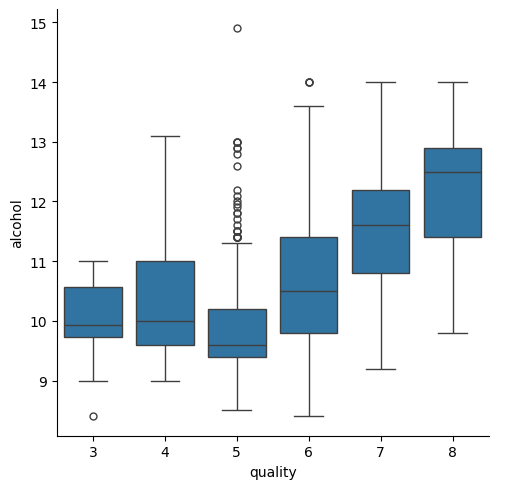

In [ ]:
#catergorial plot
sns.catplot(x='quality',y='alcohol',data=df,kind='box')

<Axes: xlabel='alcohol', ylabel='pH'>

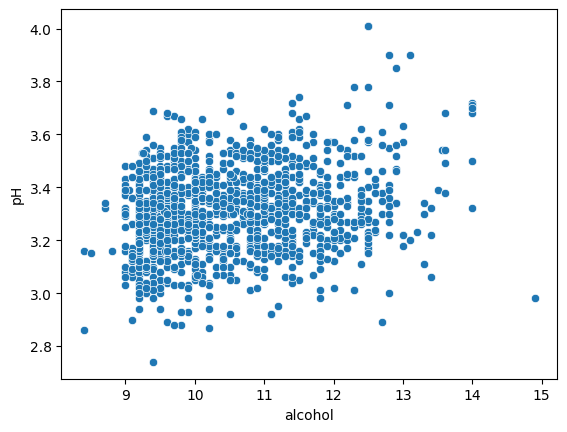

In [ ]:
sns.scatterplot(x='alcohol',y='pH',data=df)

## 2. Flight price prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_excel('https://github.com/adit-0132/machine-learning-practice/raw/refs/heads/main/datasets/flight_price.xlsx')
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [ ]:
#get basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.describe() #for price

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

### Feature Engineering


In [ ]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [ ]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)
df.info() #converting objects to date-int type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [ ]:
# Drop redundant date of journey

df.drop('Date_of_Journey',axis=1,inplace=True)

In [ ]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Min']=df['Arrival_Time'].str.split(':').str[1]
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_Min']=df['Arrival_Min'].astype(int)
df.drop('Arrival_Time',axis=1,inplace=True)
#df.drop('Arrival_min',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10683 non-null  int64 
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Date             10683 non-null  int64 
 8   Month            10683 non-null  int64 
 9   Year             10683 non-null  int64 
 10  Arrival_hour     10683 non-null  int64 
 11  Arrival_Min      10683 non-null  int64 
 12  Departure_hour   10683 non-null  int64 
 13  Departure_Min    10683 non-null  int64 
 14  Duration_hour    10683 non-null  object
 15  Duration_min     10683 non-null  object
dtypes: int64(9), object(7)
memory usage: 1.3+ MB


In [ ]:
df['Departure_hour']=df['Dep_Time'].str.split(':').str[0]
df['Departure_Min']=df['Dep_Time'].str.split(':').str[1]
df['Departure_hour']=df['Departure_hour'].astype(int)
df['Departure_Min']=df['Departure_Min'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_hour     10683 non-null  int64 
 13  Arrival_Min      10683 non-null  int64 
 14  Departure_hour   10683 non-null  int64 
 15  Departure_Min    10683 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.3+ MB


In [ ]:
df.head(3)

Airline    Source Destination                  Route Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL        01:10   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR        13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK        04:25   

  Duration Total_Stops Additional_Info  Price  Date  Month  Year  \
0   2h 50m    non-stop         No info   3897    24      3  2019   
1   7h 25m     2 stops         No info   7662     1      5  2019   
2      19h     2 stops         No info  13882     9      6  2019   

   Arrival_hour  Arrival_Min  Departure_hour  Departure_Min  
0             1           10              22             20  
1            13           15               5             50  
2             4           25               9             25

In [ ]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
df['Total_Stops'].isnull().sum()
df[df['Total_Stops'].isnull()]

Airline Source Destination Route Arrival_Time Duration Total_Stops  \
9039  Air India  Delhi      Cochin   NaN        09:25  23h 40m         NaN   

     Additional_Info  Price  Date  Month  Year  Arrival_hour  Arrival_Min  \
9039         No info   7480     6      5  2019             9           25   

      Departure_hour  Departure_Min  
9039               9             45

In [ ]:
# ordinal mapping based on stops
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1,'3 stops':3,'4 stops':4,np.nan:1})

In [ ]:
df['Total_Stops'].isnull().sum()
df.head()
# df['Total_Stops'].unique()

Airline    Source Destination                  Route Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL        01:10   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR        13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK        04:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR        23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL        21:35   

  Duration  Total_Stops Additional_Info  Price  Date  Month  Year  \
0   2h 50m            0         No info   3897    24      3  2019   
1   7h 25m            2         No info   7662     1      5  2019   
2      19h            2         No info  13882     9      6  2019   
3   5h 25m            1         No info   6218    12      5  2019   
4   4h 45m            1         No info  13302     1      3  2019   

   Arrival_hour  Arrival_Min  Departure_hour  Departure_Min  
0             1           10              22             20  
1            13           15               5             50  
2             4           25               9             25  
3            23           30              18              5  
4            21           35              16             50

In [ ]:
df['Duration'].isnull().sum()

np.int64(0)

In [ ]:
# duration conversion
df['Duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df['Duration_min']=df['Duration_min'].fillna(0)
df['Duration_min'].isnull().sum()
df.drop('Duration',axis=1,inplace=True)

KeyError: 'Duration'

In [ ]:
df.head(2)

Airline    Source Destination                  Route  Total_Stops  \
0     IndiGo  Banglore   New Delhi              BLR → DEL            0   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR            2   

  Additional_Info  Price  Date  Month  Year  Arrival_hour  Arrival_Min  \
0         No info   3897    24      3  2019             1           10   
1         No info   7662     1      5  2019            13           15   

   Departure_hour  Departure_Min Duration_hour Duration_min  
0              22             20             2           50  
1               5             50             7           25

In [ ]:
# One-Hot Encoding the categorical feats
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit_transform(df[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(ohe.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=ohe.get_feature_names_out())

Airline_Air Asia  Airline_Air India  Airline_GoAir  Airline_IndiGo  \
0                   0.0                0.0            0.0             1.0   
1                   0.0                1.0            0.0             0.0   
2                   0.0                0.0            0.0             0.0   
3                   0.0                0.0            0.0             1.0   
4                   0.0                0.0            0.0             1.0   
...                 ...                ...            ...             ...   
10678               1.0                0.0            0.0             0.0   
10679               0.0                1.0            0.0             0.0   
10680               0.0                0.0            0.0             0.0   
10681               0.0                0.0            0.0             0.0   
10682               0.0                1.0            0.0             0.0   

       Airline_Jet Airways  Airline_Jet Airways Business  \
0                      0.0                           0.0   
1                      0.0                           0.0   
2                      1.0                           0.0   
3                      0.0                           0.0   
4                      0.0                           0.0   
...                    ...                           ...   
10678                  0.0                           0.0   
10679                  0.0                           0.0   
10680                  1.0                           0.0   
10681                  0.0                           0.0   
10682                  0.0                           0.0   

       Airline_Multiple carriers  Airline_Multiple carriers Premium economy  \
0                            0.0                                        0.0   
1                            0.0                                        0.0   
2                            0.0                                        0.0   
3                            0.0                                        0.0   
4                            0.0                                        0.0   
...                          ...                                        ...   
10678                        0.0                                        0.0   
10679                        0.0                                        0.0   
10680                        0.0                                        0.0   
10681                        0.0                                        0.0   
10682                        0.0                                        0.0   

       Airline_SpiceJet  Airline_Trujet  ...  Source_Chennai  Source_Delhi  \
0                   0.0             0.0  ...             0.0           0.0   
1                   0.0             0.0  ...             0.0           0.0   
2                   0.0             0.0  ...             0.0           1.0   
3                   0.0             0.0  ...             0.0           0.0   
4                   0.0             0.0  ...             0.0           0.0   
...                 ...             ...  ...             ...           ...   
10678               0.0             0.0  ...             0.0           0.0   
10679               0.0             0.0  ...             0.0           0.0   
10680               0.0             0.0  ...             0.0           0.0   
10681               0.0             0.0  ...             0.0           0.0   
10682               0.0             0.0  ...             0.0           1.0   

       Source_Kolkata  Source_Mumbai  Destination_Banglore  \
0                 0.0            0.0                   0.0   
1                 1.0            0.0                   1.0   
2                 0.0            0.0                   0.0   
3                 1.0            0.0                   1.0   
4                 0.0            0.0                   0.0   
...               ...            ...                   ...   
10678             1.0            0.0     

## 3. Google playstore dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('https://raw.githubusercontent.com/adit-0132/machine-learning-practice/refs/heads/main/datasets/googleplaystore.csv')
df.shape

(10841, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [ ]:
df.isnull().sum() #find out missing values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df.head(2)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

  Reviews Size  Installs  Type Price Content Rating  \
0     159  19M   10,000+  Free     0       Everyone   
1     967  14M  500,000+  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up

In [ ]:
# check if all valus